# Predicting user behaviour based on e-commerce data
 
*__Author:__ Tino Merl*

__Table of Contents__

* [Introduction and planned action](#intro)
    * [CRISP-DM](#crisp)
* [Business Understanding](#bus_und)
* [Data Understanding](#dat_und)
    * [Describing the files](#fil_descr)
    * [Describing the columns](#col_descr)
    * [Focus dataset](#fcs_data)
* [Data Preparation](#dat_pre)
    * [Plotting the data by groups](#plt_grps)
* [Modeling](#mdl)
    * [Selection](#slct)
    * [Model Preparations](#mdl_prp)
    * [Fitting](#fit)
* [Evaluation](#eval)
* [Conclusion](#conc)

## Introduction and planned action<a class="anchor" id="intro"></a>
This is an assignment for the module applied programming in the summerterm of 2020 at the *FOM Hochschule für Oekonomie & Management* at the study center in cologne. In this work a dataset which contains user behaviour data from an e-commerce system will be analysed. The dataset can be found on kaggle named *Retailrocket recommender system dataset*.[[1](#kaggle_dataset)] It contains four individual files. The main focus of this notebook indeed lies on one dataset as stated in [Focus dataset](#fcs_data). The goal is to predict user behaviour. This can be done in two ways. The data can be engineered and the users can be grouped in a way to predict whether a user belongs to the buying users or not. It can also be done by using markov chains to calculate the probability of a user buying or not. Since the latter is way more complex and is beyond the scope of this analysis therefore it will be tried to engineer the data and predict buyers by new features. This whole analysis will be done via the CRISP-DM Process. 

### CRISP-DM<a class="anchor" id="crisp"></a>
CRISP-DM stands for __Cr__oss __I__ndustry __S__tandard __P__rocess for __D__ata __M__ining. It is a framework which describes the most common steps a machine learning analysis and model building should undertake. The steps are the following six.

1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Modeling
5. Evaluation
6. Deployment

They may be listed in a sequential manner, but there is a lot of back and forth between the steps. Especially between business understanding and data understanding, business understanding and evaluation such as data preparation and modeling. Figure 1 illustrates the circular nature of the process.[[2](#crisp-dm-text)]


<div style="margin:auto;">
<img style="display:block; margin-left: auto; margin-right:auto;" src="img/crisp-dm_diagramm.png"/>
<div style="width: 50%; margin:0 auto; text-align:center;"><i><b>Figure 1:</b></i> CRISP-DM diagram by statistik-dresden.de[<a href="#crisp-dm_diagramm">3</a>]</div>
</div>


Since this is an assignment and not a real business case the last step, the deployment, will be left out. The analysis will therefore end after step number five: evaluation.

## Business Understanding<a class="anchor" id="bus_und"></a>

This focus of the first step is to lay out and understand the objectives and requirements from a business perspective. The concrete tasks will also be defined here as it can be defined as a planning phase.[[2](#crisp-dm-text)]
When looking at the data the main question about it is what kind of insights can be generated from it? Another one which can be  described by the following: Is it possible to find out whether a user will buy an item or not?  This will be the main question of the oncoming analysis. But before commencing with any analysis the tasks will be defined and explained them in a detailed way.

__Tasks__

1. *Explorative analysis of the data in data understanding*
2. *Cluster unusual user behaviour and filter them out*
3. *How can user behaviour be predicted?*

__1. *Explorative analysis of the data in data understanding*__

This is a really huge dataset. It contains more than 2 million rows.[[1](#kaggle_dataset)] To even grasp what information is in these files and what hidden gems may be in them the data exploration must be thoroughly. It is arguably that this is clearly part of the data understanding chapter, but for this assignment it was made more explicit.

__2. *Cluster unusual user behaviour and filter them out*__

Filtering out the unusual user behaviour can go two ways. In some analysis this unusual behaviour could be the main focus as to find out why there are outliers and how to get these back on track. To catch these outliers and put them "back on the right track" may be the goal of some customer analysis. But for this task the goal is to try filtering them out and find out if this has any impact on the modeling stage. There are many users in the dataset who didn't buy anything or only had a very limited numbers of transactions. Therefore is a lot of noise in the dataset. This noise could be prone to overfitting.[[1](#kaggle_dataset)]

__3. *How can user behaviour be predicted?*__

The most important question of this analysis for user behaviour is whether or not the behaviour can be predicted based on historical data. This is the whole goal of this assignment. To find out whether or not the behaviour, especially whether or not someone will buy something, can be predicted. For this case different models will be tested and a look at their respective prediction accuracy will be took.

## Data Understanding<a class="anchor" id="dat_und"></a>

The goal of this chapter is trying to get familiar with the data and to identify problems or first insights from it.[[2](#crisp_dm-text)] The first step to do so is by an explorative analysis of the dataset, which also creates the foundation for the following chapter: the data preparation. Since this dataset has a usability score of 8.8 kaggle and has also a lot of context describing the dataset it's kaggle page will mostly be cited.[[1](#kaggle_dataset)]

### Describing the files<a class="anchor" id="fil_descr"></a>
As alreay mentioned the dataset consists of four files. One of them is splitted into two parts since their respective filesize goes above the kaggle size limit. Therefore two of the files can be counted as one.[[1](#kaggle_dataset)] They will also be described as one file.

__events.csv__

A file containing the user behaviour. E.g. if a user viewed an item or added it to their cart with the corresponding item and visitorid and a respective timestamp.[[1](#kaggle_dataset)]

__item_properties_part1.csv and item_properties_part2.csv__

Two files containing the item properties. This refers to the property and the value of the item as their respective itemid and a timestamp. These files contain weekly snapshots of the item properties. If the property or the value of an item differs between these weekly snapshots a new row for this item will be added to the files. The tricky part of this dataset is how the columns `property` and `value` refer to each other. Every value in these two columns was hashed. Except for the entries `available` and `categoryid`. When the column `property` has the entry `available` the column `value` refers to the availability of the item. Containing 1 for available and 0 for not. However if `property` contains the entry `categoryid` `value` refers to the item's category referencing the *category_tree.csv* file. All other values were stemmed and hashed. However the numeric values are marked with a n.[[1](#kaggle_dataset)] The description of the dataset is cited as followed: 

> All words in text values were normalized (stemming procedure: https://en.wikipedia.org/wiki/Stemming) and hashed, numbers were processed as above, e.g. text "Hello world 2017!" will become "24214 44214 n2017.000"[[1](#kaggle_dataset)]

__category_tree.csv__

This files specifies a categoryid and their respective parentid.[[1](#kaggle_dataset)]

### Describing the columns<a class="anchor" id="col_descr"></a>

The following descriptions are also citations from the kaggle dataset.

__events.csv__

* timestamp `{int}` -- the time, when an event occurred, in milliseconds since 01-01-1970.
* visitorid `{int}` -- unique identifier of the visitor.
* event `{string}` -- type of the event {“view”, “addtocart”, “transaction”}.
* itemid `{int}` -- unique identifier of the item.
* transactionid `{int}` -- unique identifier of the transaction (non empty only for transaction event type).[[1](#kaggle_dataset)]

__item_properties_part1.csv & item_properties_part2.csv__

* timestamp `{int}` -- snapshot creation time (unix timestamp in milliseconds).
* itemid `{int}` -- unique id of the item.
* property `{str}` -- property of the item. All of them had been hashed excluding "categoryid" and "available".
* value `{str}` -- property value of the item.[[1](#kaggle_dataset)]

__category_tree.csv__

* categoryid `{int}` -- unique identifier of the category.
* parentid `{int}` -- identifier of the parent category. It's empty, if parent doesn't exist.[[1](#kaggle_dataset)]

### Focus dataset<a class="anchor" id="fcs_data"></a>

After looking at the descriptions of the files and their respective columns it seems, that not all files may be relevant to the question if a user buys an item or not. Only one file, to be precise the __events.csv__, seems to hold the relevant information. The reasoning for this assumption is the following. Starting with the item properties files. They are currently hashed and their column `value` contains a mixture of different values. They range from hashed text, hashed numbers, a combination of them and normal text or numbers. A change in value or pricing may lead to a user buying but since the values are all hashed it's very difficult to make out a difference in prices in this file. Also to get a grasp about what is inside this dataset and whether or not it could be applied to the main question of this assignment is out of scope. Since the item properties where already excluded to cancel any analysis on __category_tree.csv__ is only logical. It doesn't hold any direct relation to the __events.csv__ and can only be used by utilizing the item properties. Therefore the now following quantitative and qualitative analysis will focus solely on the __events.csv__ file. 

In [1]:
# Loading of the needed packages
import datetime
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Surpress any warnings
warnings.filterwarnings("ignore")

# Setting seed
np.random.seed(28)

The first step of the quantitave analysis is to look at the dataframe with descriptive and explorative methods. The findings and their meanings will be described and why they may be added to the list of the data preparations. It will also be tried to go into more detail so there is less to write in the part of data preparation.

In [2]:
# Loading dataset
eventsDf = pd.read_csv("./data/events.csv")
eventsDf.sample(10)

,timestamp,visitorid,event,itemid,transactionid
629976,1438573436544,895853,view,432161,NaN
348678,1434570301279,229157,view,422669,NaN
937150,1439964270842,217570,view,368947,NaN
2316508,1436751804165,1015325,view,333515,NaN
2123125,1436004758561,770911,view,321219,NaN
2218502,1436402747169,689710,view,204494,NaN
1097762,1440778593222,749691,view,298883,NaN
2275467,1436523377814,965534,view,227279,NaN
1835554,1432131850263,625059,view,343947,NaN
172391,1433905443612,672582,view,53707,NaN


By looking at our sample there are two initial findings. The first one was clear from the description of the files and their columns. `timestamp` is a unix timestamp and should be casted to a datetime object for better interpretability. Finding number two is that `transactionid` seems to be casted as a float object. This is a normal behaviour since the majority of the column looks to be empty and whenever a column contains NaN values and numerics it will be casted as float. Just to make sure this assumption is right a look at the datatypes of `eventsDf` wil be taken.

In [3]:
eventsDf.dtypes

timestamp          int64
visitorid          int64
event             object
itemid             int64
transactionid    float64
dtype: object

This reassures both assumptions made above. Now built-in describe method will be used to analyze the quantitative metrics for this dataset.

In [4]:
eventsDf.describe(include="all")

,timestamp,visitorid,event,itemid,transactionid
count,2.756101e+06,2.756101e+06,2756101,2.756101e+06,22457.000000
unique,NaN,NaN,3,NaN,NaN
top,NaN,NaN,view,NaN,NaN
freq,NaN,NaN,2664312,NaN,NaN
mean,1.436424e+12,7.019229e+05,NaN,2.349225e+05,8826.497796
std,3.366312e+09,4.056875e+05,NaN,1.341954e+05,5098.996290
min,1.430622e+12,0.000000e+00,NaN,3.000000e+00,0.000000
25%,1.433478e+12,3.505660e+05,NaN,1.181200e+05,4411.000000
50%,1.436453e+12,7.020600e+05,NaN,2.360670e+05,8813.000000
75%,1.439225e+12,1.053437e+06,NaN,3.507150e+05,13224.000000


Except for the already mentioned empty columns  in `transactionid` there seems to be nothing out of ordinary. None of the other columns has any indications that any cell may be empty since their counts are all on the same level. Since the `timestamp` is still in unix format and `visitorid` as `itemid` are id columns it is hard to make any assumptions based on descriptive statistics. Nevertheless it is noteworthy that the most common entry in the column `event` is "view" with 2664312 occurences. Since there are only two other unique values that means there are only 91789 left for the other two levels of `event`. This should be mentioned because the dataset therefore has a massive overrepresantation of the top value while the other two values "addtocart" and "transaction", which are more or less the ones that are interesting, are less likely to be found. 

As of next the frequencies in the data will be plotted. It was already mentioned that `visitorid` and `itemid` are id columns. It is therefore hard to make any assumptions for this columns. Nevertheless they will be included in the plotting to find out if there may be a pattern. 

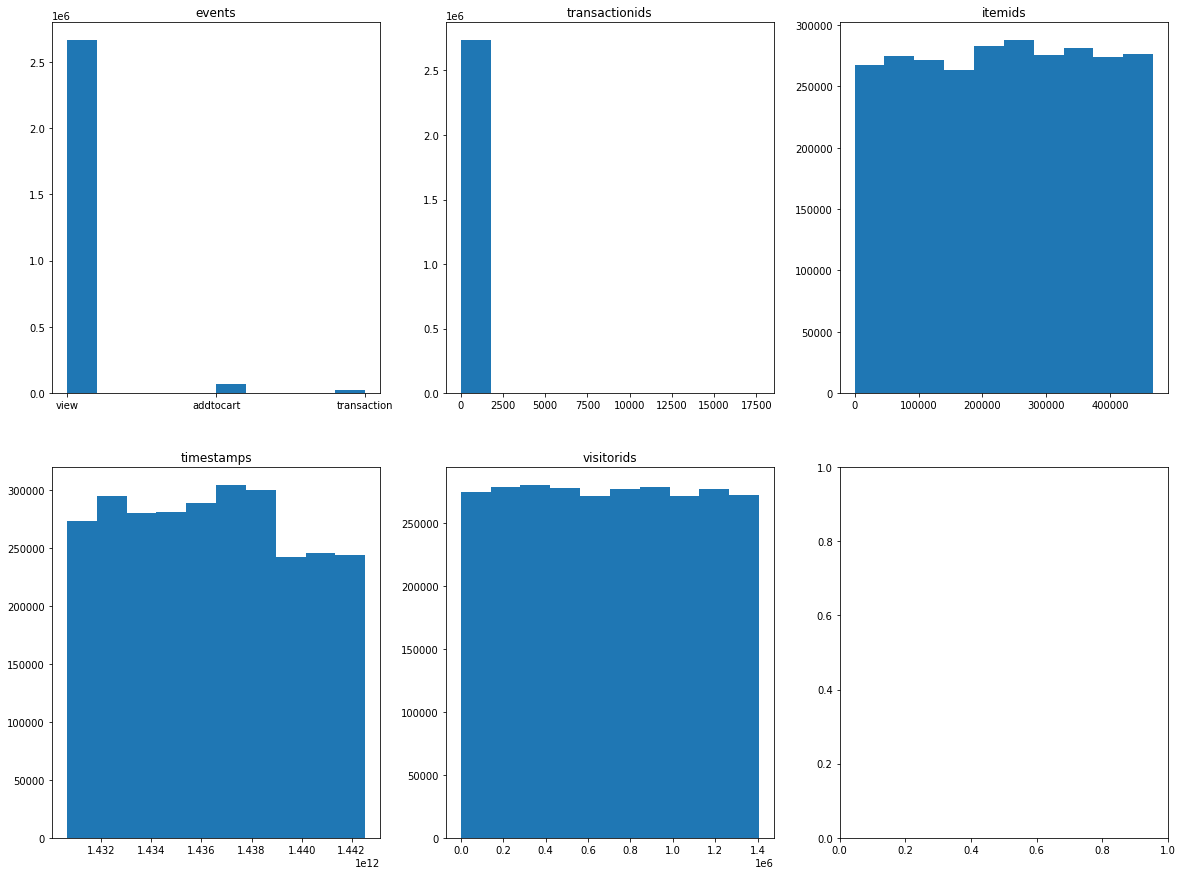

In [5]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(20, 15))

ax[0, 0].hist(eventsDf["event"])
ax[0, 0].set_title("events")
ax[0, 1].hist(eventsDf["transactionid"].fillna(0))
ax[0, 1].set_title("transactionids")
ax[0, 2].hist(eventsDf["itemid"].dropna())
ax[0, 2].set_title("itemids")
ax[1, 0].hist(eventsDf["timestamp"].dropna())
ax[1, 0].set_title("timestamps")
ax[1, 1].hist(eventsDf["visitorid"].dropna())
ax[1, 1].set_title("visitorids")

plt.draw()

<div>
<div style="width: 50%; margin:0 auto; text-align:center;"><i><b>Figure 2: </b></i>Occurcences of values for every column.</div>
</div>


This further concludes the assumption that most of the users don't have any transactions. This can be clearly seen in the top left histogram named event. Also the most occurences of transactionids seem to be at zero. `visitorid` and `itemid` don't seem to have any particular pattern. Only `timestamp` has more occurences in the lower timestamps. This could be a sudden drop in users.

Since the buying of an item is underrepresented the next question will be how many users actually bought something. These users will be saved in a new variable called `buyingUsers`. The percentage of buying users will then be calculated. Therefore the userIds which made a transaction will first be filtered out.

In [6]:
# Filter out unique visitorids that made a transaction
buyingUsers = pd.DataFrame(
    eventsDf[eventsDf.event == "transaction"]["visitorid"]
    .copy()
    .drop_duplicates(keep="first")
    .reset_index(drop=True)
)

# Calculate percentage of users buying
percBuying = buyingUsers.shape[0] / eventsDf["visitorid"].unique().shape[0]

print(f"Unique number of users who made a transaction: {buyingUsers.shape[0]}")
print(
    f"Percentage of unique users who made a transaction: {round(percBuying * 100, 2)}%"
)

Unique number of users who made a transaction: 11719
Percentage of unique users who made a transaction: 0.83%


The number of visitors who made a transaction and bought something is 11719. This number alone doesn't say alot. But compared to the number of all visitors it will give a better outlook of how many users made a transaction. The percentage of buying users is less than 1% it is 0.83%. That is a very small fraction the focus should be laid upon to identify potential buyers. So the further analysis must be conducted carefully as to not overfit the model. The last thing to look at now is whether or not any insights can be generated  from the timestamp. A useful idea would be to calculate sessions per user. If a session timer is set to a certain threshold, e.g. 30 minutes between two actions, the actions a user took can be grouped by sessions. To find out if the column is of any use for this question a user who bought an item is randomly selected and a look at their customer journey is took.

In [7]:
sampleUser = (
    eventsDf[eventsDf["event"] == "transaction"]["visitorid"].sample(1).tolist()[0]
)
sampleDf = (
    eventsDf[eventsDf["visitorid"] == sampleUser]
    .sort_values("timestamp")
    .reset_index(drop=True)
)

sampleDf["timestamp"] = pd.to_datetime(sampleDf["timestamp"], unit="ms")
sampleDf

,timestamp,visitorid,event,itemid,transactionid
0,2015-05-05 15:10:44.676,227091,view,168491,NaN
1,2015-05-05 15:11:55.893,227091,view,168491,NaN
2,2015-05-05 15:12:28.817,227091,view,461710,NaN
3,2015-05-05 15:12:52.830,227091,view,200507,NaN
4,2015-05-05 15:13:57.618,227091,view,168491,NaN
...,...,...,...,...,...
687,2015-05-28 18:32:10.454,227091,addtocart,150173,NaN
688,2015-05-28 18:33:23.880,227091,transaction,150173,15947.0
689,2015-05-28 18:42:34.655,227091,view,277082,NaN
690,2015-05-28 18:53:13.440,227091,view,440560,NaN


The timestamps look promising and there is already a case visible where the user bought an item. In row 688 the user made a transaction. A closer look at the last 10 actions that led to this transaction will now be taken.

In [8]:
sampleDf[678:689]

,timestamp,visitorid,event,itemid,transactionid
678,2015-05-28 18:10:20.416,227091,view,82278,NaN
679,2015-05-28 18:20:13.101,227091,view,306045,NaN
680,2015-05-28 18:24:44.999,227091,view,157065,NaN
681,2015-05-28 18:24:53.411,227091,view,157065,NaN
682,2015-05-28 18:25:01.848,227091,view,130231,NaN
683,2015-05-28 18:25:12.267,227091,view,184284,NaN
684,2015-05-28 18:30:33.089,227091,view,150173,NaN
685,2015-05-28 18:31:04.687,227091,view,310720,NaN
686,2015-05-28 18:31:52.884,227091,view,60759,NaN
687,2015-05-28 18:32:10.454,227091,addtocart,150173,NaN


One can clearly see, that the timestamp is in a usable format for this case. However the data preparations will be a bit more difficult based on the sheer number of entries.

## Data Preparation<a class="anchor" id="dat_pre"></a>

The focus of this chapter will be to construct the final dataset. Here the feature engineering and cleaning of the data will take place.[[2](#crisp-dm-text)] This work is defined by the following tasks.

* *Convert `timestamp` to datetime.*
* *Calculate total session time per user.*
* *Calculate average session time per user.*
* *Calculate number of sessions a user had*
* *Filter out unusual user behaviour.*

The Features to engineer are the following:

* Number of items a user viewed.
* Numer of unique items a user viewed.
* Numer of times a user added an item to a cart.
* Number of times a user bought something.
* Number of sessions a user had.
* Average session time per user.
* Total Session time per user.

To calculate whether an action belongs to a session or not a certain threshold will need to be set. For this example it will be at 30 minutes. So to speak whenever two actions of a user are more than 30 minutes apart a new session "will be started". This will need to be calculated for every user. But the first step is to cast the timestamp column to datetime. The dataframe will also be sorted first by `visitorid` and then by `timestamp` in an ascending order. The sorting is needed so it'll be easier to identify if an action by a certain user belongs to the same session or a new one.

In [9]:
# Cast timestamp to datetime and sort by visitorid and timestamp
eventsDf["timestamp"] = pd.to_datetime(eventsDf["timestamp"], unit="ms")
eventsDf = eventsDf.sort_values(["visitorid", "timestamp"]).reset_index(drop=True)
eventsDf.head(10)

,timestamp,visitorid,event,itemid,transactionid
0,2015-09-11 20:49:49.439,0,view,285930,NaN
1,2015-09-11 20:52:39.591,0,view,357564,NaN
2,2015-09-11 20:55:17.175,0,view,67045,NaN
3,2015-08-13 17:46:06.444,1,view,72028,NaN
4,2015-08-07 17:51:44.567,2,view,325215,NaN
5,2015-08-07 17:53:33.790,2,view,325215,NaN
6,2015-08-07 17:56:52.664,2,view,259884,NaN
7,2015-08-07 18:01:08.920,2,view,216305,NaN
8,2015-08-07 18:08:25.669,2,view,342816,NaN
9,2015-08-07 18:17:24.375,2,view,342816,NaN


After doing so it is now possible to calculate the time difference between each action. What is done afterwards is taking the current timestamp of every row and substract the timestamp from the row before to get the duration. It is no problem that the time difference between different users is also calculated. Reason why is because a new column named `sameUser` will also be added. This one compares the `visitorid` of the current row with the one above. If it is the same it returns True otherwise False. The last step is then to add a row named `sessionlimit`. This one is True when the actions are within the threshold and False if not.

In [10]:
# Calculate time differnces
eventsDf["duration"] = eventsDf["timestamp"] - eventsDf["timestamp"].shift()

# Look up if the visitorid is the same as in the row above
eventsDf["sameUser"] = eventsDf["visitorid"].eq(eventsDf["visitorid"].shift())

# Calculate if a duration between two actions is within our set treshold of 30
# minutes
limit = datetime.timedelta(minutes=30)
eventsDf["sessionlimit"] = eventsDf["duration"].apply(
    lambda x: True if x <= limit else False
)

eventsDf.head(10)

,timestamp,visitorid,event,itemid,transactionid,duration,sameUser,sessionlimit
0,2015-09-11 20:49:49.439,0,view,285930,NaN,NaT,False,False
1,2015-09-11 20:52:39.591,0,view,357564,NaN,0 days 00:02:50.152000,True,True
2,2015-09-11 20:55:17.175,0,view,67045,NaN,0 days 00:02:37.584000,True,True
3,2015-08-13 17:46:06.444,1,view,72028,NaN,-30 days +20:50:49.269000,False,True
4,2015-08-07 17:51:44.567,2,view,325215,NaN,-6 days +00:05:38.123000,False,True
5,2015-08-07 17:53:33.790,2,view,325215,NaN,0 days 00:01:49.223000,True,True
6,2015-08-07 17:56:52.664,2,view,259884,NaN,0 days 00:03:18.874000,True,True
7,2015-08-07 18:01:08.920,2,view,216305,NaN,0 days 00:04:16.256000,True,True
8,2015-08-07 18:08:25.669,2,view,342816,NaN,0 days 00:07:16.749000,True,True
9,2015-08-07 18:17:24.375,2,view,342816,NaN,0 days 00:08:58.706000,True,True


It is now finished to look up whether actions belong to the same session or a new one. A column named `session` can now be added. It will be a counter. It starts at 1 for every user. If the column `sameUser` is True and `sessionlimit` is False 1 will be added to `session`. Afterwards a new column `sessionid` which is a merge from `visitorid` and `session` will be created. This is used to create a unique column per session per user.

In [11]:
sessionList = []
session = 1

# Iterate over every row from the columns sameUser and sessionlimit
for r in zip(eventsDf["sameUser"], eventsDf["sessionlimit"]):

    # If a user is not the same session counter will be reset
    if r[0] == False:
        session = 1

    # If a user is the same but actions are over the timelimit a new
    # session will begin
    elif r[0] == True and r[1] == False:
        session += 1
    sessionList.append(session)

# Add everything to the dataframe and create a new column
eventsDf["session"] = sessionList
eventsDf["sessionid"] = (
    eventsDf["visitorid"].astype(str) + "_" + eventsDf["session"].astype(str)
)

eventsDf.head(10)

,timestamp,visitorid,event,itemid,transactionid,duration,sameUser,sessionlimit,session,sessionid
0,2015-09-11 20:49:49.439,0,view,285930,NaN,NaT,False,False,1,0_1
1,2015-09-11 20:52:39.591,0,view,357564,NaN,0 days 00:02:50.152000,True,True,1,0_1
2,2015-09-11 20:55:17.175,0,view,67045,NaN,0 days 00:02:37.584000,True,True,1,0_1
3,2015-08-13 17:46:06.444,1,view,72028,NaN,-30 days +20:50:49.269000,False,True,1,1_1
4,2015-08-07 17:51:44.567,2,view,325215,NaN,-6 days +00:05:38.123000,False,True,1,2_1
5,2015-08-07 17:53:33.790,2,view,325215,NaN,0 days 00:01:49.223000,True,True,1,2_1
6,2015-08-07 17:56:52.664,2,view,259884,NaN,0 days 00:03:18.874000,True,True,1,2_1
7,2015-08-07 18:01:08.920,2,view,216305,NaN,0 days 00:04:16.256000,True,True,1,2_1
8,2015-08-07 18:08:25.669,2,view,342816,NaN,0 days 00:07:16.749000,True,True,1,2_1
9,2015-08-07 18:17:24.375,2,view,342816,NaN,0 days 00:08:58.706000,True,True,1,2_1


Since the dataframe now also contains the information about sessions a session duration can now be calculated. To do so  the timestamp of the first action of a session will be substracted from the last action's timestamp. The parameters `subset` and `keep` of pandas built in method `drop_duplicates` will be utilized to first get the first action of a session and afterwards the last one.
They will then be merged in a new dataframe and the timestamps will be substracted. The new column `total_sessionsduration` will then be a `timedelta` object. Since transformations with such a `timedelta` object are computional heavy it will be casted into seconds as an integer. This makes it faster to group the columns by `visitorid` to get the sum of all sessions a user had.

In [12]:
# Getting the starting timestamp of every session
sessionsStart = eventsDf.drop_duplicates(
    subset=["visitorid", "sessionid"], keep="first"
)[["timestamp", "visitorid", "sessionid"]]

# Getting the ending timestamp of every session
sessionsEnd = eventsDf.drop_duplicates(subset=["visitorid", "sessionid"], keep="last")[
    ["timestamp", "visitorid", "sessionid"]
]

# Merging them to get a new dataframe
sessionsDuration = sessionsStart.merge(
    sessionsEnd, on=["visitorid", "sessionid"], how="left"
)

# Calculating the duration between start and end and also casting it to seconds
sessionsDuration["total_sessionsduration"] = (
    sessionsDuration["timestamp_y"] - sessionsDuration["timestamp_x"]
).dt.seconds

# Group by visitorid to get the total duration of all sessions
sessionsDuration = (
    sessionsDuration.drop(columns=["timestamp_x", "timestamp_y", "sessionid"])
    .groupby(["visitorid"], as_index=False)
    .sum()
)
sessionsDuration.head(10)

,visitorid,total_sessionsduration
0,0,327
1,1,0
2,2,1753
3,3,0
4,4,0
5,5,0
6,6,1015
7,7,186
8,8,0
9,9,0


The next step is to get the total number of sessions a user had. This is a fairly simple operation. The dataframe just needs to be reduced to the columns `visitorid` and `session` and afterwards it can be grouped by `visitorid` calculating the max of `sessions` per user.

In [13]:
# Reducing to the columns visitorid and session and getting the max value for session
sessionsNums = (
    eventsDf[["visitorid", "session"]]
    .groupby(["visitorid"], as_index=False)
    .max()
    .rename(columns={"session": "num_sessions"})
)
sessionsNums.head(10)

,visitorid,num_sessions
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1
5,5,1
6,6,3
7,7,2
8,8,1
9,9,1


The preparations in the area of user sessions are now finished. Therefore it is possible to move on and calculate the number of unique item views. To do so firstly a subset of the dataframe is created to have only the event `view` remaining, drop the duplicates with the subset of of `visitorid` and `itemid` keeping the first occurences. It will then ne grouped by `visitorid` counting the number of entries.

In [14]:
# Getting unique views on items
uniqueViews = (
    eventsDf[eventsDf["event"] == "view"]
    .drop_duplicates(subset=["visitorid", "itemid"], keep="first")[
        ["visitorid", "itemid"]
    ]
    .sort_values(["visitorid"])
)

# Grouping unique item Views
uniqueViews = (
    uniqueViews.groupby(["visitorid"], as_index=False)
    .count()
    .rename(columns={"itemid": "unique_item_views"})
)

uniqueViews.head(10)

,visitorid,unique_item_views
0,0,3
1,1,1
2,2,4
3,3,1
4,4,1
5,5,1
6,6,2
7,7,3
8,8,1
9,9,1


The point of merging everything together is almost reached. But before doing so it is needed to add a new column named `bought` to the dataframe `buyingUsers`. By merging it with `eventsDf` a new dataframe called `procEventsDf` is created. Shorthanded for *processed events dataframe*. The reasond behind doing so is not needing to reread the whole dataset when a false data preparation step should be undone. Next is to fill the empty values in `bought` with 0 in the new dataframe as to identify users who didn't buy anything. After that three new columns are added which are one hot encoded from the column `events`. This will help calculating the total number of actions for every type of action per user. To get these sums group by is used againd and the sums of the new made columns are added.

In [15]:
# Adding a new column to the dataframe of buying users
buyingUsers["bought"] = 1

# Merging the two dataframes
procEventsDf = pd.merge(eventsDf, buyingUsers, on="visitorid", how="left")

# Replacing NaNs
procEventsDf["bought"].fillna(0, inplace=True)

# Get number of actions for every possible event
procEventsDf = pd.get_dummies(procEventsDf, columns=["event"], prefix="items")
procEventsDf = (
    procEventsDf[
        ["visitorid", "bought", "items_view", "items_addtocart", "items_transaction"]
    ]
    .groupby(["visitorid", "bought"], as_index=False)
    .sum()
)

# Cast everything to integer
procEventsDf = procEventsDf.astype("int64")
procEventsDf.sort_values(["visitorid"]).head(10)

,visitorid,bought,items_view,items_addtocart,items_transaction
0,0,0,3,0,0
1,1,0,1,0,0
2,2,0,8,0,0
3,3,0,1,0,0
4,4,0,1,0,0
5,5,0,1,0,0
6,6,0,5,1,0
7,7,0,3,0,0
8,8,0,1,0,0
9,9,0,1,0,0


The final step is to merge all the feature dataframes to `procEventsDf` and calculate the mean duration of sessions per user. After this the feature engineering is finished and some manual outlier detection will take place.

In [16]:
# Merge with unique views
procEventsDf = procEventsDf.merge(uniqueViews, on="visitorid", how="left")

# Merge with session duration
procEventsDf = procEventsDf.merge(sessionsDuration, on="visitorid", how="left")

# Merge with number of sessions
procEventsDf = procEventsDf.merge(sessionsNums, on="visitorid", how="left")

# Calculate average session time
procEventsDf["mean_sessionsduration"] = (
    procEventsDf["total_sessionsduration"] / procEventsDf["num_sessions"]
)
procEventsDf.head(10)

,visitorid,bought,items_view,items_addtocart,items_transaction,unique_item_views,total_sessionsduration,num_sessions,mean_sessionsduration
0,0,0,3,0,0,3.0,327,1,327.000000
1,1,0,1,0,0,1.0,0,1,0.000000
2,2,0,8,0,0,4.0,1753,1,1753.000000
3,3,0,1,0,0,1.0,0,1,0.000000
4,4,0,1,0,0,1.0,0,1,0.000000
5,5,0,1,0,0,1.0,0,1,0.000000
6,6,0,5,1,0,2.0,1015,3,338.333333
7,7,0,3,0,0,3.0,186,2,93.000000
8,8,0,1,0,0,1.0,0,1,0.000000
9,9,0,1,0,0,1.0,0,1,0.000000


What can be seen now is a dataframe with every visitorid, whether they bought or not, their number of items view, their number of items added to cart, their number of transactions, their number of unique item views, their total duration of all their sessions, their number of sessions and their mean session duration. With these values it should be possible to find out about the unusal user behaviour. But what first strikes as odd is that the column `unique_item_views` now looks like it was casted as a float instead of integer. As mentioned in the beginning this is usually a sign that there a empty rows present. Which means there are users who have never viewed any item. Before going further ahead this should be checked.

In [17]:
procEventsDf[procEventsDf["unique_item_views"].isna()]

,visitorid,bought,items_view,items_addtocart,items_transaction,unique_item_views,total_sessionsduration,num_sessions,mean_sessionsduration
1159,1159,0,0,1,0,NaN,0,1,0.0
1399,1399,0,0,2,0,NaN,0,1,0.0
1480,1480,0,0,1,0,NaN,0,1,0.0
1742,1742,0,0,1,0,NaN,0,1,0.0
2277,2277,0,0,1,0,NaN,0,1,0.0
...,...,...,...,...,...,...,...,...,...
1406820,1406820,0,0,1,0,NaN,0,1,0.0
1407059,1407059,0,0,1,0,NaN,0,1,0.0
1407319,1407319,0,0,1,0,NaN,0,1,0.0
1407398,1407398,1,0,1,1,NaN,757,1,757.0


There are really users who don't have any entry in the column `unique_item_views`. And they also have a zero in `items_view`. But at least one of them has bought an item. Since this could still be an error in the data wrangling this should be checked in the raw data. Therefore some of these ids are used as filters in the original dataframe.

In [18]:
eventsDf[eventsDf["visitorid"].isin([1159, 1399, 1406820, 1407398])]

,timestamp,visitorid,event,itemid,transactionid,duration,sameUser,sessionlimit,session,sessionid
2112,2015-07-27 22:59:58.750,1159,addtocart,337777,NaN,9 days 18:07:55.810000,False,False,1,1159_1
2539,2015-05-10 22:07:31.393,1399,addtocart,136523,NaN,-65 days +06:33:28.489000,False,True,1,1399_1
2540,2015-05-10 22:07:31.708,1399,addtocart,136523,NaN,0 days 00:00:00.315000,True,True,1,1399_1
2754703,2015-07-09 21:38:04.767,1406820,addtocart,377888,NaN,20 days 04:13:26.148000,False,False,1,1406820_1
2755789,2015-07-07 03:34:38.082,1407398,addtocart,218917,NaN,53 days 05:14:07.181000,False,False,1,1407398_1
2755790,2015-07-07 03:47:15.969,1407398,transaction,218917,10009.0,0 days 00:12:37.887000,True,True,1,1407398_1


The assumptions made above were right. There are users inside this dataset who didn't ever see any item which is really odd. This is the first unusual behaviour that should be treated carefully. Shouldn't users see at least one item before proceeding to buy? But to make sure this doesn't make any problems the NaNs will be replaced with zero and the column is casted to int.

In [19]:
procEventsDf["unique_item_views"].fillna(0, inplace=True)
procEventsDf = procEventsDf.astype({"unique_item_views": "int64"})
procEventsDf[procEventsDf["unique_item_views"].isna()]

,visitorid,bought,items_view,items_addtocart,items_transaction,unique_item_views,total_sessionsduration,num_sessions,mean_sessionsduration


To find out more unusual behaviour a closer look at the columns `items_view` and `unique_item_views` will be taken and they will be plotted them as seperate groups.

### Plotting the data by groups<a class="anchor" id="plt_grps"></a>
For this the data will be parted into two groups. Users who bought an item and those who don't. The first pairs of plots will be about unusual behaviour. The second pair is used to find out if there's any linearity or clear distinctions in the newly engineered dataframe.

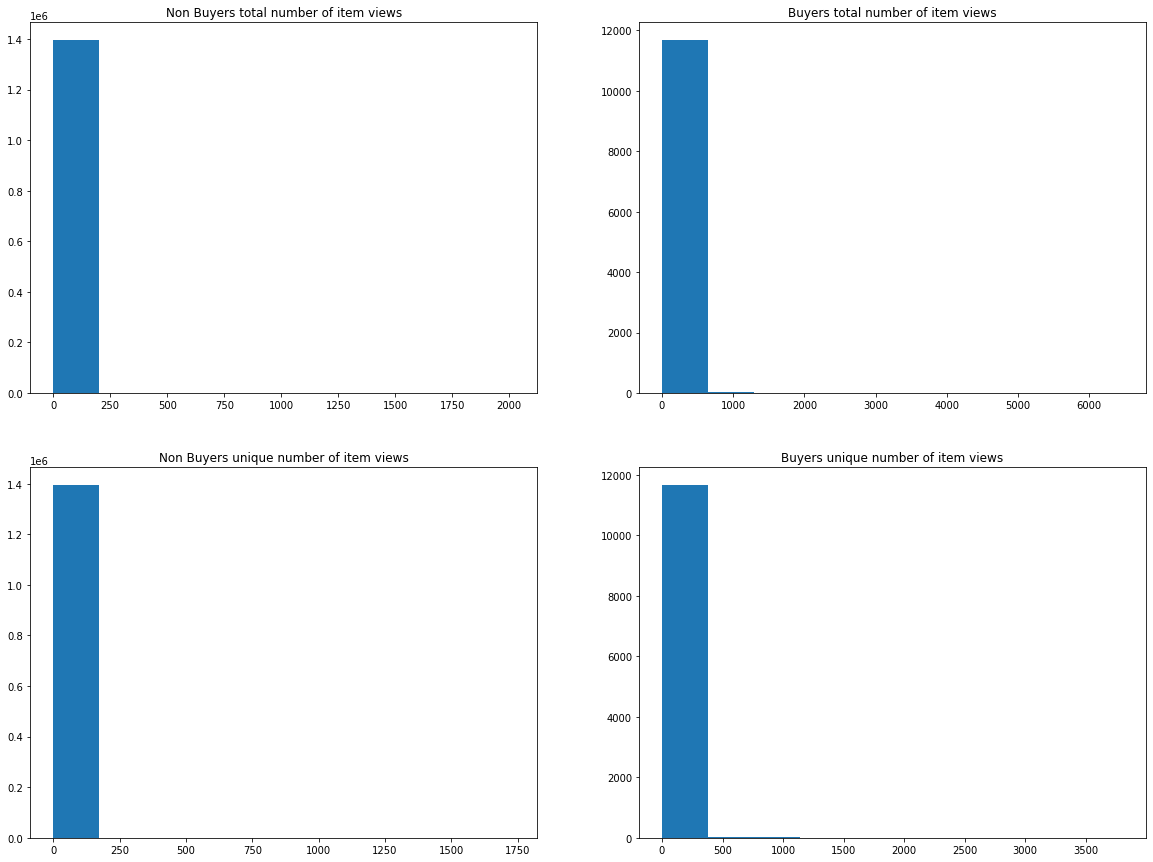

In [20]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(20, 15))

ax[0, 0].hist(procEventsDf[procEventsDf["bought"] == 0]["items_view"])
ax[0, 0].set_title("Non Buyers total number of item views")
ax[0, 1].hist(procEventsDf[procEventsDf["bought"] == 1]["items_view"])
ax[0, 1].set_title("Buyers total number of item views")
ax[1, 0].hist(procEventsDf[procEventsDf["bought"] == 0]["unique_item_views"])
ax[1, 0].set_title("Non Buyers unique number of item views")
ax[1, 1].hist(procEventsDf[procEventsDf["bought"] == 1]["unique_item_views"])
ax[1, 1].set_title("Buyers unique number of item views")

plt.draw()

<div>
<div style="width: 50%; margin:0 auto; text-align:center;"><i><b>Figure 3.1: </b></i>Plotting buying and non buying users by their number of total item views and unique item views</div>
</div>

Most Users seem to have a number of below 100 views. It also doesn't matter whether the user is buying or not and also the unique number of views. The graphs will now be recreated with limited ranges. The focus will therefore be on the total views and with different thresholds.

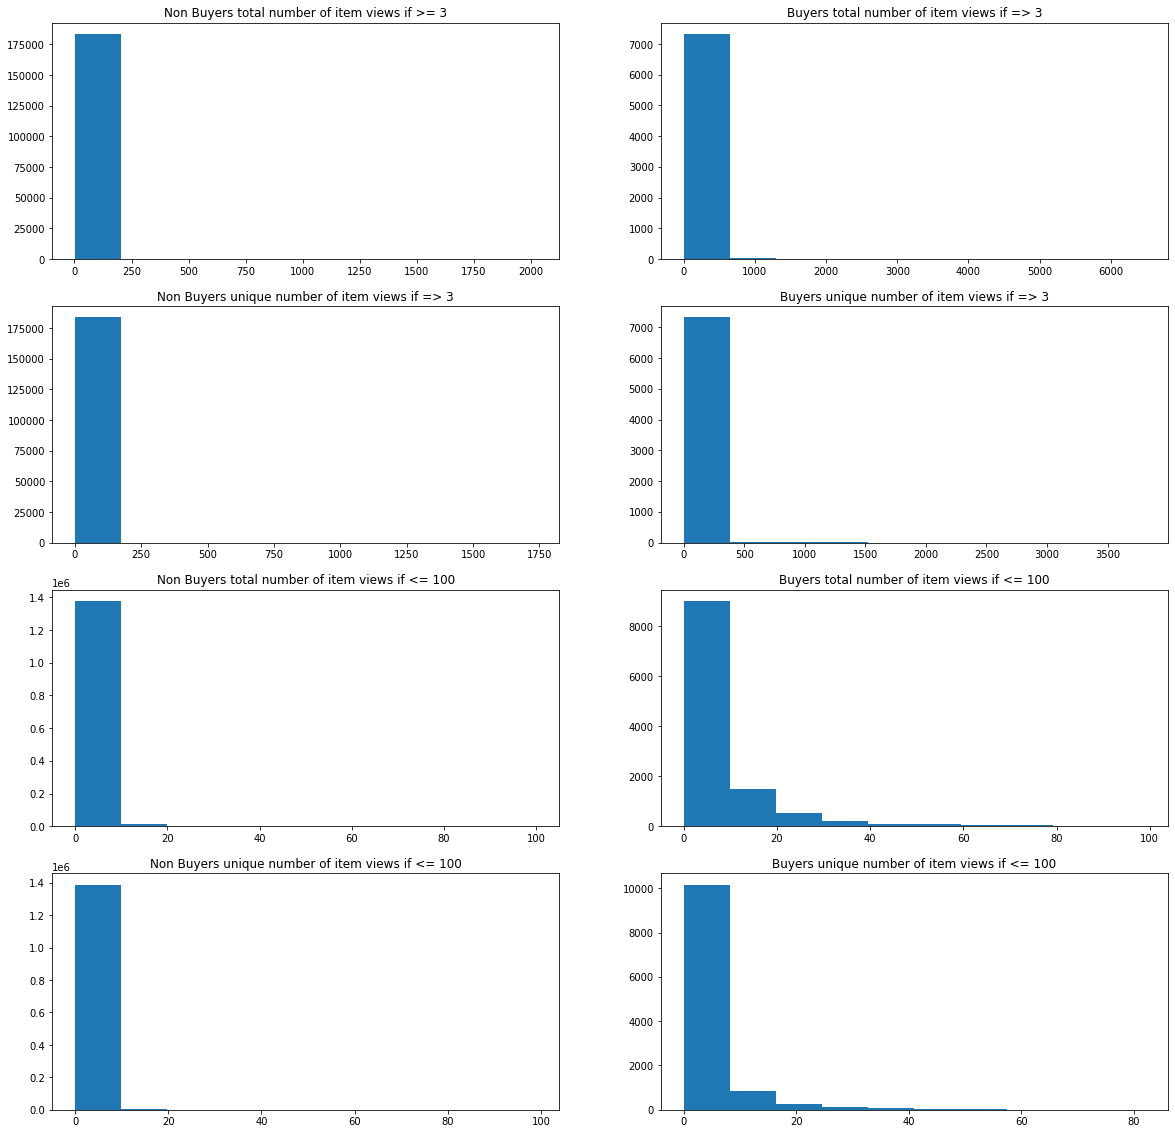

In [21]:
fig, ax = plt.subplots(ncols=2, nrows=4, figsize=(20, 20))

ax[0, 0].hist(
    procEventsDf[(procEventsDf["bought"] == 0) & (procEventsDf["items_view"] >= 3)][
        "items_view"
    ]
)
ax[0, 0].set_title("Non Buyers total number of item views if >= 3")

ax[0, 1].hist(
    procEventsDf[(procEventsDf["bought"] == 1) & (procEventsDf["items_view"] >= 3)][
        "items_view"
    ]
)
ax[0, 1].set_title("Buyers total number of item views if => 3")

ax[1, 0].hist(
    procEventsDf[(procEventsDf["bought"] == 0) & (procEventsDf["items_view"] >= 3)][
        "unique_item_views"
    ]
)
ax[1, 0].set_title("Non Buyers unique number of item views if => 3")

ax[1, 1].hist(
    procEventsDf[(procEventsDf["bought"] == 1) & (procEventsDf["items_view"] >= 3)][
        "unique_item_views"
    ]
)
ax[1, 1].set_title("Buyers unique number of item views if => 3")

ax[2, 0].hist(
    procEventsDf[(procEventsDf["bought"] == 0) & (procEventsDf["items_view"] <= 100)][
        "items_view"
    ]
)
ax[2, 0].set_title("Non Buyers total number of item views if <= 100")

ax[2, 1].hist(
    procEventsDf[(procEventsDf["bought"] == 1) & (procEventsDf["items_view"] <= 100)][
        "items_view"
    ]
)
ax[2, 1].set_title("Buyers total number of item views if <= 100")

ax[3, 0].hist(
    procEventsDf[(procEventsDf["bought"] == 0) & (procEventsDf["items_view"] <= 100)][
        "unique_item_views"
    ]
)
ax[3, 0].set_title("Non Buyers unique number of item views if <= 100")

ax[3, 1].hist(
    procEventsDf[(procEventsDf["bought"] == 1) & (procEventsDf["items_view"] <= 100)][
        "unique_item_views"
    ]
)
ax[3, 1].set_title("Buyers unique number of item views if <= 100")

plt.draw()

<div>
<div style="width: 50%; margin:0 auto; text-align:center;"><i><b>Figure 3.2: </b></i>Plotting buying and non buying users by their number of total item views and unique item views with different ranges</div>
</div>

These graphs indicate, that the most outliers seem to be the users which have more than 100 views. The first distinction beetween the buying users and those who don't can also be seen. While users that don't buy any items have the most number of views in the range from 0 to 10 views and a small fraction in the area from 10 to 20 the buying users tend to be a little bit more spread in the higher numbers. On the graphs on the right side it can be seen, that users who made a transaction also have a strong base in the area of 0 to 10 views but they also are more spreading towards the higher numbers. As a last graphical analysis the two levels above will now be combined.

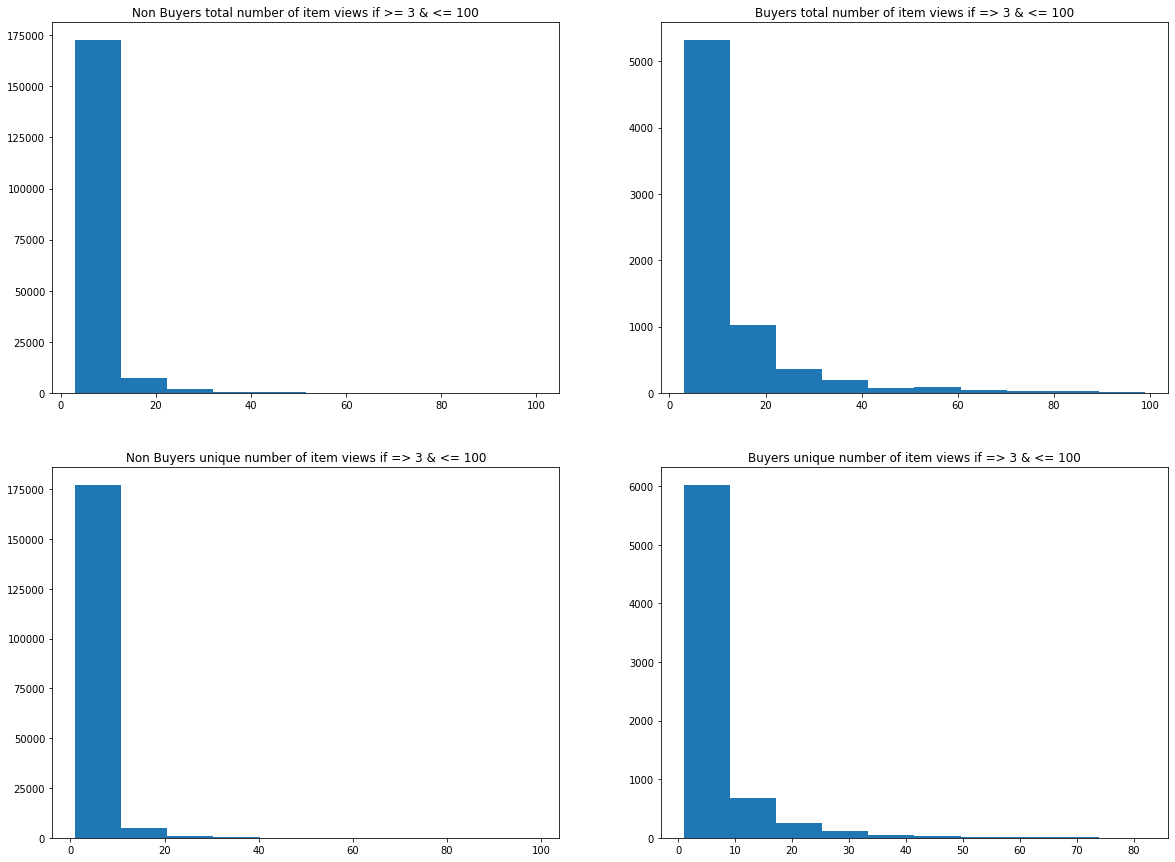

In [22]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(20, 15))

ax[0, 0].hist(
    procEventsDf[
        (procEventsDf["bought"] == 0)
        & (procEventsDf["items_view"] >= 3)
        & (procEventsDf["items_view"] <= 100)
    ]["items_view"]
)
ax[0, 0].set_title("Non Buyers total number of item views if >= 3 & <= 100")
ax[0, 1].hist(
    procEventsDf[
        (procEventsDf["bought"] == 1)
        & (procEventsDf["items_view"] >= 3)
        & (procEventsDf["items_view"] <= 100)
    ]["items_view"]
)
ax[0, 1].set_title("Buyers total number of item views if => 3 & <= 100")
ax[1, 0].hist(
    procEventsDf[
        (procEventsDf["bought"] == 0)
        & (procEventsDf["items_view"] >= 3)
        & (procEventsDf["items_view"] <= 100)
    ]["unique_item_views"]
)
ax[1, 0].set_title("Non Buyers unique number of item views if => 3 & <= 100")
ax[1, 1].hist(
    procEventsDf[
        (procEventsDf["bought"] == 1)
        & (procEventsDf["items_view"] >= 3)
        & (procEventsDf["items_view"] <= 100)
    ]["unique_item_views"]
)
ax[1, 1].set_title("Buyers unique number of item views if => 3 & <= 100")


plt.draw()

<div>
<div style="width: 50%; margin:0 auto; text-align:center;"><i><b>Figure 3.3: </b></i>Plotting buying and non buying users by their number of total item views and unique item views with combined ranges.</div>
</div>


This hardens the assumptions made above. The most density of users is in the range of 3 to 100 views. This filtering was made completly manual. While it's safe to say this is a way do it the question arises whether or not these outliers could be detected automatically. The reasoning behind this is that in the future user behaviour might change. If certain thresholds are set manually they could be outdated in the near future. In reality it would be tried to filter out these outliers by anomaly detection methods like a classifier. For the sake of this assignment, and since the data won't change, this will be restricted to manually filtering out the data.

As it was already found out in the graphs above there are definitely outliers which may make the dataset prone to overfitting. The question to answer now is if there's any linearity in the dataset and if there are any clear distionctions between the groups. To do so the pairplot method from seaborn is used and the dataset is reduced to the range found out above.

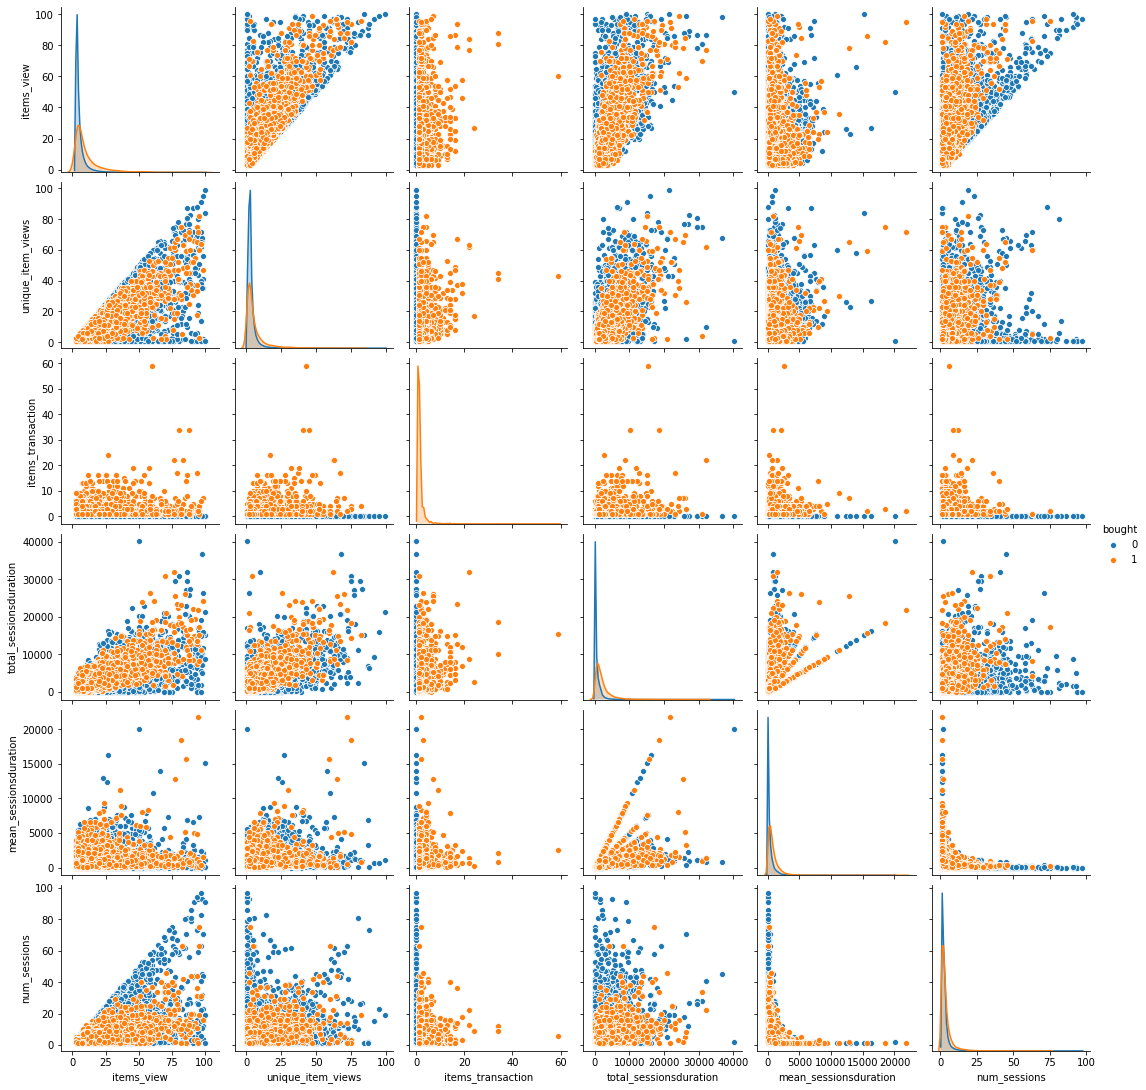

In [23]:
sns.pairplot(
    procEventsDf[
        (procEventsDf["items_view"] >= 3) & (procEventsDf["items_view"] <= 100)
    ],
    x_vars=[
        "items_view",
        "unique_item_views",
        "items_transaction",
        "total_sessionsduration",
        "mean_sessionsduration",
        "num_sessions",
    ],
    y_vars=[
        "items_view",
        "unique_item_views",
        "items_transaction",
        "total_sessionsduration",
        "mean_sessionsduration",
        "num_sessions",
    ],
    hue="bought",
)

<div>
<div style="width: 50%; margin:0 auto; text-align:center;"><i><b>Figure 4: </b></i>Pairplot for the engineered features to guess the linearity.</div>
</div>


In the scatterplots one is able to make out some linearity. The most common and obvious linearity is between `unique_item_views` and `item_views`. This should be no surprise. However what surprises is that there seems to be no real difference between the two groups. But one thing different is, that the group of non buying users tend spread well troughout the lower ranks of `item_views`. A not too new finding considering the manual outlier detection. The only clear distinction can be made in the combination of `total_sessionsduration` and `num_sessions`. The non buying users tend to have more unique sessions than buying users but tend to have a lower `total_sessionsduration`. In every other combination the groups are overlapping.

## Modeling<a class="anchor" id="mdl"></a>
### Selection<a class="anchor" id="slct"></a>
As for the model selection the range is limited to classifiers. Some of the more common classifiers are

* Logistic regression
* Gaussian naive bayes
* Random forest classifier
* Support vector classification
* Decision tree classifier
* Nearest Neighbors[[4](#classifiers)]

Since the features are not really independent and there are high correlations between the features a logistic regression can not be used as a classificator.[[5](#log_reg)] This is supported by the correlation matrix for our features.

In [24]:
corr = procEventsDf.drop(columns=["visitorid", "bought"]).corr()
corr.style.background_gradient(cmap="coolwarm")

,items_view,items_addtocart,items_transaction,unique_item_views,total_sessionsduration,num_sessions,mean_sessionsduration
items_view,1.000000,0.757616,0.782903,0.978888,0.952153,0.619803,0.222622
items_addtocart,0.757616,1.000000,0.903854,0.735658,0.816382,0.315340,0.169587
items_transaction,0.782903,0.903854,1.000000,0.769944,0.864906,0.284208,0.140702
unique_item_views,0.978888,0.735658,0.769944,1.000000,0.936932,0.572383,0.217528
total_sessionsduration,0.952153,0.816382,0.864906,0.936932,1.000000,0.524229,0.247517
num_sessions,0.619803,0.315340,0.284208,0.572383,0.524229,1.000000,0.080034
mean_sessionsduration,0.222622,0.169587,0.140702,0.217528,0.247517,0.080034,1.000000


Nearly all of the features have high correlations (>0.7) with each other. This makes the logistic regression not usable. Another classifier that will not be used is the support vector classifier. The reasoning behind this is the sheer amount of data. The dataframe contains well over 1 million samples. A support classifier is impractical for that number of samples.[[6](#svc_sklearn)]

In [25]:
nrows = procEventsDf.shape[0]
print(f"Number of Rows: {nrows}")

Number of Rows: 1407580


This boils it down to using the remaining four classifiers. They will be tested against each other and the one with the highest accuracy will be picked. But before doing so there are some final preparations that needs to be done.

### Model Preparations<a class="anchor" id="mdl_prp"></a>
The final preparations are the following: the data will be saved in a new variable so if a mistake happens or if the model needs to be tuned a bit more it is not needed to rerun the whole notebook again. The dataset will also be limited to the range of total item views mentioned a few times above. The last step before starting to fit the models is to drop the columns `visitorid`, `items_transaction` and `items_addtocart`. The reason to drop these columns is fairly simple. `visitorid` is just a unique column in the dataset. Since it is unique for every user it doesn't generate much insights. `items_transaction` and `items_addtocart` however will make the model susceptible to overfitting. Since adding an item to a cart often leads to buying said item and if a user buys or not is the whole idea behind this modeling.

In [26]:
from IPython.display import Image  
import pydotplus
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz

modelDf = procEventsDf[
    (procEventsDf["items_view"] >= 3) & (procEventsDf["items_view"] <= 100)
].drop(columns=["visitorid", "items_transaction", "items_addtocart"])

Another thing needed to adress is the overrepresentation of non buying users. As already found out only 0.83% of every user bought something. The dataframe is already reduced. So it only holds a subset. Now lets take a look how the numbers compare to each other.

In [27]:
modelBought = modelDf[modelDf["bought"] == 1].shape[0]
modelBoughtPerc = modelBought / modelDf.shape[0]
modelNotBought = modelDf[modelDf["bought"] == 0].shape[0]
modelNotBoughtPerc = modelNotBought / modelDf.shape[0]

print(f"Buying Users: {modelBought} / {round(modelBoughtPerc * 100, 2)}%")
print(f"Non Buying Users: {modelNotBought} / {round(modelNotBoughtPerc * 100, 2)}%")

Buying Users: 7190 / 3.77%
Non Buying Users: 183434 / 96.23%


Since some are already excluded it seems the buying user have gained a portion. They now make up 3.77% of the remaining dataset. This is still dangerous to that extent as that this will definetly overfit the model if continued with the data like that. To approach this particual problem a lot of the non buying users will be excluded. This will be done by dropping some of them and run the calculation from above again.

In [28]:
dropRows = modelDf[modelDf["bought"] == 0].sample(frac=0.85).index.to_list()
modelDf.drop(dropRows, inplace=True)

modelBought = modelDf[modelDf["bought"] == 1].shape[0]
modelBoughtPerc = modelBought / modelDf.shape[0]
modelNotBought = modelDf[modelDf["bought"] == 0].shape[0]
modelNotBoughtPerc = modelNotBought / modelDf.shape[0]

print(f"Buying Users: {modelBought} / {round(modelBoughtPerc * 100, 2)}%")
print(f"Non Buying Users: {modelNotBought} / {round(modelNotBoughtPerc * 100, 2)}%")

Buying Users: 7190 / 20.72%
Non Buying Users: 27515 / 79.28%


By removing 85% of the non buying users the dataset is left with a number of 27515 users wo didn't purchase anything. It also brought up the percentage of buying users to 20.72% of the dataset.


### Fitting<a class="anchor" id="fit"></a>
After the preparations are now done the data will be split into training and test data. The test data size will be 33% of the original dataset. The following step is then fitting the different models with the training data.

In [29]:
X = modelDf.drop(columns=["bought"])
y = modelDf["bought"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=28
)

models = [
    ("Naive Bayes", GaussianNB()),
    ("Random Forest", RandomForestClassifier(max_depth=4, random_state=28)),
    ("Decision Tree", DecisionTreeClassifier(max_depth=4, random_state=28)),
    ("Nearest Neighbors", KNeighborsClassifier()),
]

for name, model in models:
    clf = model.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print(f"Accuracy for {name}: {accuracy}")

Accuracy for Naive Bayes: 0.8084344713175587
Accuracy for Random Forest: 0.8231904304549027
Accuracy for Decision Tree: 0.8245001309700515
Accuracy for Nearest Neighbors: 0.7956867196367764


The regular Decsion Tree beat the random forest by a margin. The decision tree will therefore be evaluated in the final part.

### Evaluation<a class="anchor" id="eval"></a>

To start the evaluation the confusion matrix will be utilized. This will help out to find whether the classificator just predicted the major class or had some different errors.

[[8657  376]
 [1634  786]]


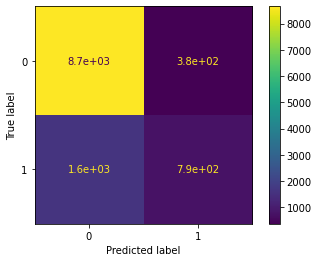

In [30]:
clf = DecisionTreeClassifier(max_depth=4, random_state=28).fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(metrics.confusion_matrix(y_test, y_pred))
metrics.plot_confusion_matrix(clf, X_test, y_test)
plt.show()

<div>
<div style="width: 50%; margin:0 auto; text-align:center;"><i><b>Figure 5: </b></i>Confusion Matrix for the classifier.</div>
</div>

The classifier tends to predict more non buying users. This can stem from a two conditions.

1. The data still has an overrepresentation of non buying users.
2. The groups don't have the clearest distinctions.

The first point should be clear. Even after breaking it down there is a ratio from 80% non buying users to 20 % buying. A bit of tweaking to ease out the overrepresentation could do the trick so that the classifier might be more able to predict better.

The second one is a bit more difficult to address. Figure 4 clearly show a lot of overlapping in between the groups. This is definitly made clear when looking at the diagonal graphs. The greatest distinction can be made in the combination of `total_sessionsduration` and `num_sessions`. But the confusion matrix and the accuracy score alone don't tell the full story. To evaluate further the precision and recall will be used. These two metrics use the confusion matrix to evaluate the performance of a model. They are calculated by the following equations:

\begin{align}
Precision = \frac{True Positive}{Predicted Positives}
\end{align}

\begin{align}
Recall = \frac{True Positives}{Actual Positives}
\end{align}[[7](#prec_rec)]

In [31]:
recall = metrics.recall_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)

print(f"Precision Score: {precision}")
print(f"Recall Score: {recall}")

Precision Score: 0.6764199655765921
Recall Score: 0.3247933884297521


While the model has a good accuracy these two values tend to be fairly low. This isn't ideal since this means the predictions tend to prefer the negative group. Before diving deeper into the evaluation it will now be tested if the models performance can be boosted by reducing the overrepresentation of non buying users. A new dataframe will be used so it doesn't interfere with the old work. Another assumption made for the ongoing evaluation is whether or not the manual filtering of actions was really helpful for the model. Therefore no filtering will take place in the oncoming model tweaking. The classifier will be tested with different fractions of non buying users filtered out.

In [32]:
fractions = [0.96, 0.965, 0.97, 0.975, 0.98, 0.985, 0.99]
for f in fractions:
    modelDf_eval = procEventsDf.drop(
        columns=["visitorid", "items_transaction", "items_addtocart"]
    )

    dropRows = modelDf_eval[modelDf_eval["bought"] == 0].sample(frac=f).index.to_list()
    modelDf_eval.drop(dropRows, inplace=True)

    modelBought = modelDf_eval[modelDf_eval["bought"] == 1].shape[0]
    modelBoughtPerc = modelBought / modelDf_eval.shape[0]
    modelNotBought = modelDf_eval[modelDf_eval["bought"] == 0].shape[0]
    modelNotBoughtPerc = modelNotBought / modelDf_eval.shape[0]

    X = modelDf_eval.drop(columns=["bought"])
    y = modelDf_eval["bought"]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.33, random_state=28
    )

    clf_eval = DecisionTreeClassifier(max_depth=4, random_state=28).fit(
        X_train, y_train
    )
    y_pred = clf_eval.predict(X_test)

    accuracy = round(metrics.accuracy_score(y_test, y_pred), 3)
    precision = round(metrics.precision_score(y_test, y_pred), 3)
    recall = round(metrics.recall_score(y_test, y_pred), 3)
    print(f"Fraction: {f}")
    print(f"Buying Users: {modelBought} / {round(modelBoughtPerc * 100, 2)}%")
    print(f"Non Buying Users: {modelNotBought} / {round(modelNotBoughtPerc * 100, 2)}%")
    print(f"Accuracy Score: {round(accuracy * 100, 2)}%")
    print(f"Precision Score: {round(precision * 100, 2)}%")
    print(f"Recall Score: {round(recall * 100, 2)}%\n")

Fraction: 0.96
Buying Users: 11719 / 17.35%
Non Buying Users: 55834 / 82.65%
Accuracy Score: 92.1%
Precision Score: 78.4%
Recall Score: 74.9%

Fraction: 0.965
Buying Users: 11719 / 19.35%
Non Buying Users: 48855 / 80.65%
Accuracy Score: 92.0%
Precision Score: 76.8%
Recall Score: 84.1%

Fraction: 0.97
Buying Users: 11719 / 21.87%
Non Buying Users: 41876 / 78.13%
Accuracy Score: 91.3%
Precision Score: 80.7%
Recall Score: 77.5%

Fraction: 0.975
Buying Users: 11719 / 25.14%
Non Buying Users: 34897 / 74.86%
Accuracy Score: 91.5%
Precision Score: 78.7%
Recall Score: 90.6%

Fraction: 0.98
Buying Users: 11719 / 29.57%
Non Buying Users: 27917 / 70.43%
Accuracy Score: 91.9%
Precision Score: 80.3%
Recall Score: 95.6%

Fraction: 0.985
Buying Users: 11719 / 35.89%
Non Buying Users: 20938 / 64.11%
Accuracy Score: 91.5%
Precision Score: 84.9%
Recall Score: 92.8%

Fraction: 0.99
Buying Users: 11719 / 45.64%
Non Buying Users: 13959 / 54.36%
Accuracy Score: 92.7%
Precision Score: 88.4%
Recall Score: 96.

By not filtering out the behaviour branded as unusual the model got a direct increase in all of the values. Even if the percentages are kept at an inequal level the model gets an accuracy boost from about +10%, precision also goes up about +10% and the recall gained a plus from over 40%. A huge increase. But the best performance for all three measures is for the last fraction. This will now be used as the base model for further evaluation. The first step is now to look again at the confusion matrix.

[[4137  489]
 [ 129 3719]]


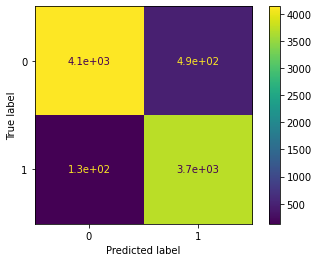

In [33]:
print(metrics.confusion_matrix(y_test, y_pred))
metrics.plot_confusion_matrix(clf_eval, X_test, y_test)
plt.show()

<div>
<div style="width: 50%; margin:0 auto; text-align:center;"><i><b>Figure 6: </b></i>Confusion Matrix for the adjusted classifier.</div>
</div>

As it can be seen now the reduction of the overrepresentation and the elimination of manual filtering led to better prediction results. The false predictions went down by a lot. This is a good sign that the adjustments made were indeed correct. The main part of the next step will be the feature importance.

In [34]:
for name, importance in zip(X.columns, clf_eval.feature_importances_):
    print(f"{name}: {round(importance, 4)}")

items_view: 0.0784
unique_item_views: 0.0
total_sessionsduration: 0.902
num_sessions: 0.0194
mean_sessionsduration: 0.0002


Seems like the columns `total_sessionsduration` has by far the most impact for the decisions of the tree. While the others don't have even a fraction of the importance. When compared with Figure 4 there is a slight shift to the right visible for `total_sessionsduration` in the group of buying users. If compared to the other features it's the one which seems to have the least overlap between the groups of buying users and those who don't. This was already mentioned a few times. It should therefore be no surprise that the most importance is put on this particular feature. As for now the decision process of the tree will be visualized.

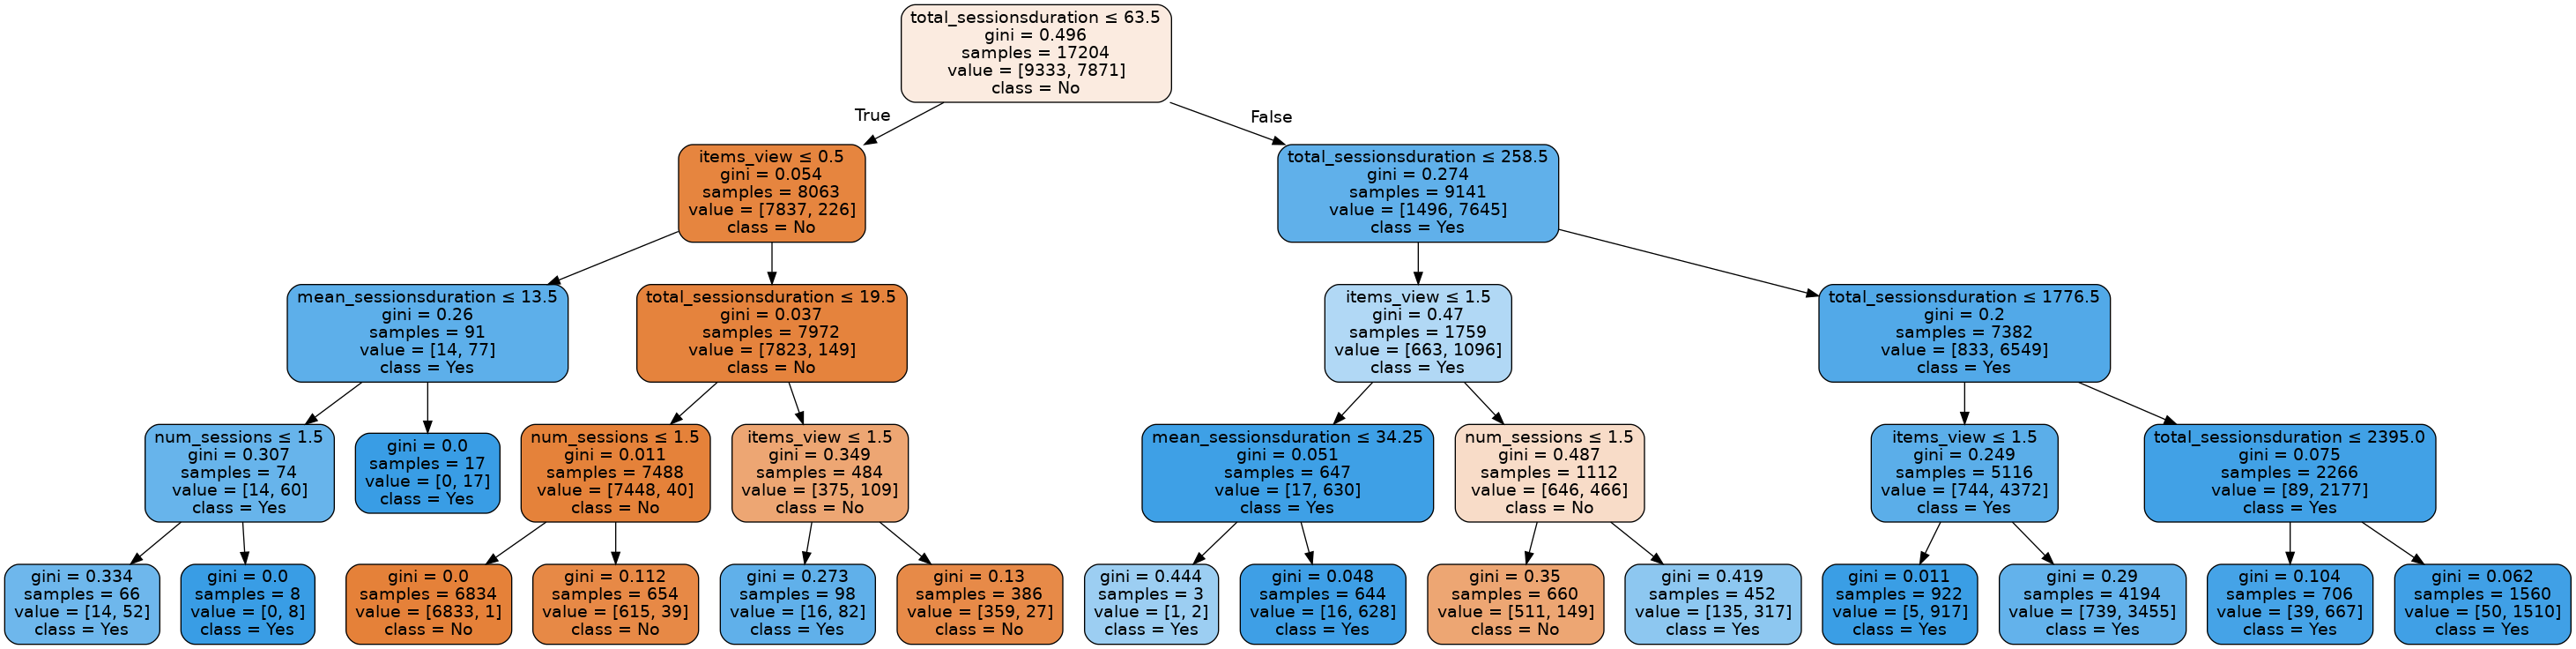

In [35]:
dot_data = StringIO()
export_graphviz(clf_eval, 
                out_file=dot_data,
                filled=True,
                rounded=True,
                special_characters=True,
                feature_names=X.columns,
                class_names=["No", "Yes"])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

<div>
<div style="width: 50%; margin:0 auto; text-align:center;"><i><b>Figure 7: </b></i>Decision Process of the adjusted classifier.</div>
</div>

The tree visualization reinforces the assumptions made above. The decision trees first node tests for `total_sessionsduration` where the most positive classifications can be found on the right side, the one with the higher duration, of the tree. Overall is the testing on this feature done several times in the whole decision process.

## Conclusion<a class="anchor" id="conc"></a>

The summary of the analysis will be by the lines of the tasks defined in business understanding.

1. *Explorative analysis of the data in data understanding*
2. *Cluster unusual user behaviour and filter them out*
3. *How can user behaviour be predicted?*

__1. *Explorative analysis of the data in data understanding*__

This was a feat which generated a lot of insights. While some insights can be generated from clickstream data by just looking at the raw data the most benefical informations were generated after feature engineering and looking at the aggregated data. This was by far the most extensive part which consumed most of the work. The main key points of this task are:

* Only a small fraction of users actually buys an item.
* The greatest distinction between the groups is in the session time.
* Users who buy an item tend to have seen more items.
* Some users don't have any views on items and directly buy them.
* Non Buying users tend to have more unique sessions

__2. *Cluster unusual user behaviour and filter them out*__

This was done manually in [plotting the data by groups](#plt_grps). While it helped to filter out some unusual behaviour and concentrate more on focus groups the accuracy of prediction took a big loss by it. So maybe for further analysis this shouldn't be done manually. This can be concluded by the following: it may be helpful to filter out unusual behaviour but it always comes with a loss.

__3. *How can user behaviour be predicted?*__

The model that was used was a simple classifying algorithm. Just with basic models it is possible to achieve a lot when good use of feature engineering is made. There are way more sophisticated models that could be used to predict the behaviour of a user. But just by transforming the raw data a lot of insights were generated that can help when working with raw user behaviour data like this.

## Footnotes
[1]<a class="anchor" id="kaggle_dataset"></a> Retailrocket (2017) Retailrocket recommender system dataset, Version 4. Retrieved 2020-04-19 from https://www.kaggle.com/retailrocket/ecommerce-dataset

[2]<a class="anchor" id="crisp-dm-text"></a> Wirth, R., & Hipp, J. (2000). CRISP-DM: Towards a standard process model for data mining. In Proceedings of the 4th international conference on the practical applications of knowledge discovery and data mining (pp. 29-39). London, UK: Springer-Verlag.

[3]<a class="anchor" id="crisp-dm_diagramm"></a> Wolf Riepel (2012). CRISP-DM: Ein Standard-Prozess-Modell für Data Mining. Retrieved 2020-05-10 from https://statistik-dresden.de/archives/1128

[4]<a class="anchor" id="classifiers"></a> scikit-learn developers (2019). Classifier comparison. Retrieved 2020-05-30 from https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py

[5]<a class="anchor" id="log_reg"></a> Cohen, J., Cohen, P., West, S. G., & Aiken, L. S. (2013). Applied multiple regression/correlation analysis for the behavioral sciences. Routledge.

[6]<a class="anchor" id="svc_sklearn"></a> scikit-learn developers (2019). sklearn.svm.SVC. Retrieved 2020-05-23 from https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

[7]<a class="anchor" id="prec_rec"></a> Yousef, M., & Allmer, J. (Eds.). (2014). miRNomics: microRNA biology and computational analysis. New York, NY: Humana Press.